In [8]:
import numpy as np
import pandas as pd
import os
#from keras.preprocessing import sequence
#from keras.preprocessing.text import Tokenizer
#from keras.layers import Dense ,Dropout
#from keras.models import Sequential
#from keras.layers import Embedding ,SimpleRNN,LSTM
import matplotlib.pyplot as plt
import tensorflow.keras as keras

In [16]:
data = pd.read_csv(r'E:\IMDB Dataset.csv')

In [17]:
data['sentiment']=data['sentiment'].replace(to_replace=['positive','negative'],value=[1,0])

In [18]:
x_train = data.iloc[0:37500,0]
y_train = np.asarray(data.iloc[0:37500,1])

x_test = data.iloc[37500:,0]
y_test = np.asarray(data.iloc[37500:,1])

In [19]:
max_feature = 10000
maxlen = 100
#batch_size = 32
time_steps_to_unroll=100

In [20]:
tokenizer = keras.preprocessing.text.Tokenizer(num_words=max_feature)

In [21]:
tokenizer.fit_on_texts(x_train)  #Builds the word index
#Turns strings into lists of integer indices
train_sequences = tokenizer.texts_to_sequences(x_train)
train_word_index = tokenizer.word_index

In [22]:
'''Transforming Training data which is in text into a sequence of integer. '''
tokenizer.fit_on_texts(x_test)  #Builds the word index
#Turns strings into lists of integer indices
test_sequences = tokenizer.texts_to_sequences(x_test)
test_word_index = tokenizer.word_index #Return word index for each word

In [23]:
'''This function transforms a list of sequences (lists of integers) 
into a 2D Numpy array.'''
x_train = keras.preprocessing.sequence.pad_sequences(train_sequences,maxlen=maxlen)
x_test = keras.preprocessing.sequence.pad_sequences(test_sequences,maxlen=maxlen)

In [24]:
glove_dir = r'E:\glove.6B'

embedding_index = {}
f=open(os.path.join(glove_dir,'glove.6B.100d.txt'),encoding='utf8')
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:],dtype='float32')
    embedding_index[word] = coefs
f.close()

In [25]:
#Training data embedding matrix
embedding_dim=100
embedding_matrix_train = np.zeros((max_feature,embedding_dim))
for word, i in train_word_index.items():
    if i<max_feature:
        embedding_vector_train = embedding_index.get(word)
        if embedding_vector_train is not None:
            embedding_matrix_train[i] = embedding_vector_train

In [56]:
model = keras.models.Sequential()
model.add(keras.layers.Embedding(max_feature,embedding_dim,input_length=time_steps_to_unroll,weights=[embedding_matrix_train]))
model.add(keras.layers.LSTM(embedding_dim,return_sequences=True))
model.add(keras.layers.LSTM(embedding_dim))
#model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1,activation='sigmoid'))
model.layers[0].trainable = False
model.compile(optimizer = 'Adam',loss = 'binary_crossentropy',metrics = ['acc'])
history = model.fit(x_train,y_train,epochs = 10,batch_size = 256,validation_split = 0.2)

Train on 30000 samples, validate on 7500 samples
Epoch 1/10
30000/30000 [==============================] - 183s 6ms/step - loss: 0.5974 - acc: 0.6746 - val_loss: 0.5513 - val_acc: 0.7283
Epoch 2/10
30000/30000 [==============================] - 189s 6ms/step - loss: 0.4713 - acc: 0.7766 - val_loss: 0.4489 - val_acc: 0.7957
Epoch 3/10
30000/30000 [==============================] - 187s 6ms/step - loss: 0.4247 - acc: 0.8031 - val_loss: 0.4193 - val_acc: 0.8028
Epoch 4/10
30000/30000 [==============================] - 188s 6ms/step - loss: 0.3914 - acc: 0.8227 - val_loss: 0.3912 - val_acc: 0.8209
Epoch 5/10
30000/30000 [==============================] - 188s 6ms/step - loss: 0.3673 - acc: 0.8346 - val_loss: 0.3922 - val_acc: 0.8215
Epoch 6/10
30000/30000 [==============================] - 186s 6ms/step - loss: 0.3511 - acc: 0.8415 - val_loss: 0.3589 - val_acc: 0.8363
Epoch 7/10
30000/30000 [==============================] - 188s 6ms/step - loss: 0.3307 - acc: 0.8543 - val_loss: 0.3615 - v

In [57]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)

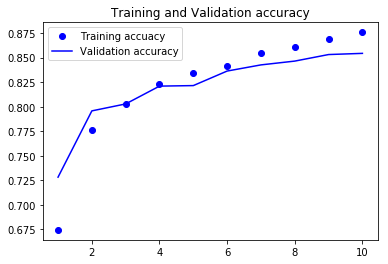

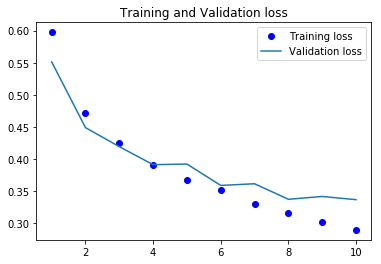

In [58]:
plt.plot(epochs,acc,'bo',label='Training accuacy')
plt.plot(epochs,val_acc,'b',label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs,loss,'bo',label='Training loss')
plt.plot(epochs,val_loss,label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()

In [59]:
results=model.predict(x_test,batch_size=128)

In [52]:
predicted_labels = []
for i in range(len(results)):
    if(results[i]<0.50):
        predicted_labels.append(0)
    else:
        predicted_labels.append(1)
    

In [53]:
boolean_results = np.count_nonzero(predicted_labels == y_test)

In [54]:
Testing_accuracy = boolean_results/y_test.shape[0]

In [55]:
Testing_accuracy

0.59024